In [25]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [26]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from datetime import datetime, timedelta

In [28]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [29]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [30]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [33]:
# Use the inspector to get the column name and type of the 'station' and measurement tables
inspector = inspect(engine)
print("Column name and type in 'station' table:")
columns = inspector.get_columns('station')
for col in columns:
    print(col["name"], col["type"])

print("\nColumn name and type in 'measurement' table:")
columns = inspector.get_columns('measurement')
for col in columns:
    print(col["name"], col["type"])

# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
print("\nMost recent date in the data set:")
print(most_recent_date.strftime('%Y-%m-%d'))

Column name and type in 'station' table:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT

Column name and type in 'measurement' table:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Most recent date in the data set:
2017-08-23


In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print("\nMost recent date in the data set:")
print(most_recent_date.strftime('%Y-%m-%d'))

# Calculate the date one year from the last date in data set.
one_year_back = most_recent_date - timedelta(days=365, hours=23)
print("\nOne year from the most recent date in the data set:")
print(one_year_back.strftime('%Y-%m-%d'))


Most recent date in the data set:
2017-08-23

One year from the most recent date in the data set:
2016-08-22


In [35]:
# Perform a query to retrieve the data and precipitation scores
past_year_precipitation = session.query(measurement).\
    filter(measurement.date >= one_year_back).\
    filter(measurement.date <= most_recent_date).\
    all()

for row in past_year_precipitation:
    print(row.date, row.prcp)

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

In [36]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
past_year_precipitation = [{'Date': row.date, 'Precipitation': row.prcp} for row in past_year_precipitation]
past_year_precipitation_df = pd.DataFrame(past_year_precipitation)
print(past_year_precipitation_df)

            Date  Precipitation
0     2016-08-23           0.00
1     2016-08-24           0.08
2     2016-08-25           0.08
3     2016-08-26           0.00
4     2016-08-27           0.00
...          ...            ...
2225  2017-08-19           0.09
2226  2017-08-20            NaN
2227  2017-08-21           0.56
2228  2017-08-22           0.50
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [37]:
# Sort the dataframe by date
past_year_precipitation_sorted = past_year_precipitation_df.sort_values(by='Date')
past_year_precipitation_sorted = past_year_precipitation_sorted.reset_index(drop=True)
print(past_year_precipitation_sorted)

            Date  Precipitation
0     2016-08-23           0.00
1     2016-08-23            NaN
2     2016-08-23           1.79
3     2016-08-23           0.05
4     2016-08-23           0.15
...          ...            ...
2225  2017-08-22           0.00
2226  2017-08-23           0.00
2227  2017-08-23           0.00
2228  2017-08-23           0.08
2229  2017-08-23           0.45

[2230 rows x 2 columns]


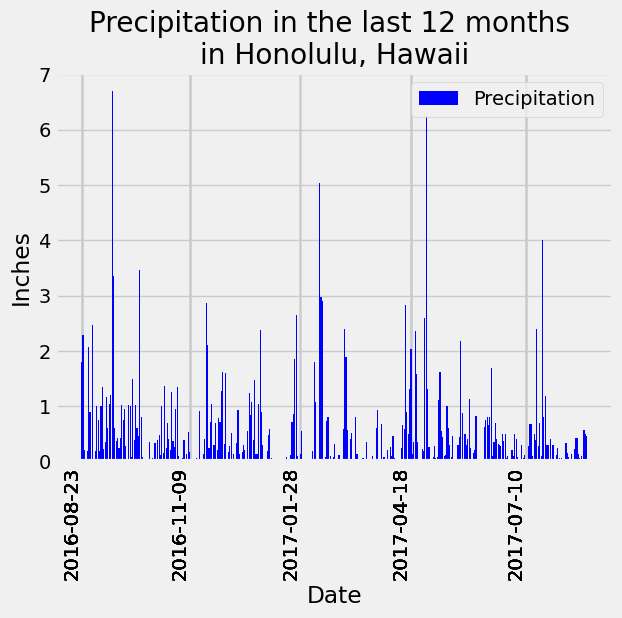

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
past_year_precipitation_sorted['Date'] = pd.to_datetime(past_year_precipitation_sorted['Date'])

x_axis = past_year_precipitation_sorted['Date']
y_axis = past_year_precipitation_sorted['Precipitation']

plt.bar(x_axis, y_axis, color='b', align="center", label="Precipitation")

plt.title("Precipitation in the last 12 months \nin Honolulu, Hawaii")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()

specific_dates = pd.to_datetime(['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'])
tick_positions = [i for i, date in enumerate(x_axis) if date in specific_dates]
plt.xticks(ticks=x_axis[tick_positions], labels=[date.strftime('%Y-%m-%d') for date in x_axis[tick_positions]], rotation=90, ha='right')

plt.show()

# Exploratory Precipitation Analysis

In [39]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = past_year_precipitation_sorted['Precipitation'].describe()
summary_stats = pd.DataFrame(summary_stats)
summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).count()
total_stations

9

In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(measurement.station,func.count(measurement.date)).group_by(measurement.station).order_by(func.count(measurement.date).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'

lowest_temperature = session.query(func.min(measurement.tobs))\
    .filter(measurement.station == station_id)\
    .scalar()
print("Lowest temperature of station USC00519281: ")
print(lowest_temperature)

highest_temperature = session.query(func.max(measurement.tobs))\
    .filter(measurement.station == station_id)\
    .scalar()
print("\nHighest temperature of station USC00519281: ")
print(highest_temperature)

average_temperature = session.query(func.avg(measurement.tobs))\
    .filter(measurement.station == station_id)\
    .scalar()
print("\nAverage temperature of station USC00519281: ")
print(average_temperature)

Lowest temperature of station USC00519281: 
54.0

Highest temperature of station USC00519281: 
85.0

Average temperature of station USC00519281: 
71.66378066378067


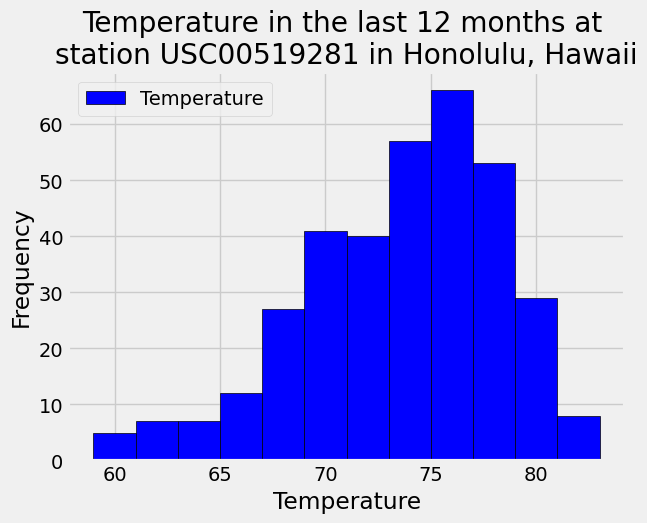

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

past_year_temperature = session.query(measurement).\
    filter(measurement.date >= one_year_back).\
    filter(measurement.date <= most_recent_date).\
    filter(measurement.station == 'USC00519281').\
    all()

past_year_temperature = [{'Date': row.date, 'Temperature': row.tobs} for row in past_year_temperature]
past_year_temperature_df = pd.DataFrame(past_year_temperature)

plt.hist(past_year_temperature_df['Temperature'], bins=12, color='b', edgecolor='black', label='Temperature')

plt.title("Temperature in the last 12 months at \nstation USC00519281 in Honolulu, Hawaii")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()

plt.show()

# Close Session

In [44]:
# Close Session
session.close()